# Week5-Visualization

## 데이터 시각화
p. 3~5

#### 데이터 시각화는 왜 필요할까?
- 많은 양의 데이터를 한눈에 보여줄 수 있음
- 때로는 전문 지식이 없더라도, 데이터 인사이트를 찾을 수 있음
- 통계값으로 보이지 않는 데이터 패턴을 조사할 수 있음

## 맷플롯립(Matplotlib): 선 그래프, 산점도와 상관계수
p. 6~35
- 파이썬 (준) 표준 시각화 도구

#### 실습 준비
- matplotlib 설치: conda install matplotlib
- 통계청에서 제공하는 시도간 인구 이동 데이터셋 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 선 그래프(line plot)
- 연속하는 데이터 값들을 직선 혹은 곡선으로 연결하여 데이터 값 사이의 관계를 나타냄
- 목표: 서울에서 경기도로 전출한 사람들 수 연도별 조사

In [3]:
df = pd.read_csv('./Week5-실습데이터/시도별 전출입 인구수.csv', na_values='-')
df.sample(3)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
31,NaN,전라북도,10814.0,13192.0,16583.0,18642.0,16647.0,34411.0,29835.0,28444.0,...,18390.0,18332.0,17569.0,17755.0,16120,14909,14566,14835,13835,13179
236,NaN,부산광역시,6633.0,7100.0,4764.0,6476.0,9731.0,15304.0,11784.0,13927.0,...,1756.0,1464.0,1518.0,1651.0,1508,1471,1621,1731,1582,1545
214,NaN,경상남도,1481.0,1227.0,1351.0,1901.0,3321.0,5215.0,3964.0,4523.0,...,2232.0,2187.0,2115.0,2193.0,2128,2119,2057,2259,1751,1726


In [6]:
# 결손값 채우고, 서울 데이터만 추출
df = df.fillna(method='ffill')    # 결측값 직전의 값으로 결측값 채움
df.sample(3)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
109,대전광역시,서울특별시,766.0,855.0,1007.0,1229.0,1132.0,1861.0,1832.0,1875.0,...,17325.0,17439.0,15793.0,14890.0,14570,14156,14172,13559,13726,14118
228,충청남도,충청남도,121675.0,138377.0,125416.0,165914.0,144920.0,315561.0,175247.0,218193.0,...,204302.0,187758.0,177372.0,179652.0,161743,159556,165101,163496,163006,161612
83,인천광역시,충청북도,766.0,855.0,1007.0,1229.0,1132.0,1861.0,1832.0,1875.0,...,4588.0,4157.0,4347.0,3952.0,4167,4172,4210,4624,4303,4051


In [7]:
# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별']=='서울특별시') & (df['전입지별']!='서울특별시')
df_seoul= df[mask]

# 어차피 전출지는 모두 '서울특별시'니까 컬럼 자체 삭제
df_seoul = df_seoul.drop(['전출지별'], axis=1)

# '전입지'가 index가 되게 함
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [10]:
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985.0,1419016.0,1210559.0,1647268.0,1819660.0,2937093.0,2495620.0,2678007.0,3028911.0,2441242.0,...,2083352.0,1925452.0,1848038.0,1834806.0,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,17353.0,17738.0,17418.0,18816.0,16135,16153,17320,17009,15062,14484
대구광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,9720.0,10464.0,10277.0,10397.0,10135,10631,10062,10191,9623,8891
인천광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,50493.0,45392.0,46082.0,51641.0,49640,47424,43212,44915,43745,40485
광주광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,10846.0,11725.0,11095.0,10587.0,10154,9129,9759,9216,8354,7932
대전광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,13515.0,13632.0,13819.0,13900.0,14080,13440,13403,13453,12619,11815
울산광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,5057.0,4845.0,4742.0,5188.0,5691,5542,6047,5950,5102,4260
세종특별자치시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,5057.0,4845.0,4742.0,5188.0,2998,2851,6481,7550,5943,5813
경기도,130149.0,150313.0,93333.0,143234.0,149045.0,253705.0,202276.0,207722.0,237684.0,278411.0,...,412408.0,398282.0,410735.0,373771.0,354135,340801,332785,359337,370760,342433


In [11]:
# 서울에서 경기도로 이동한 데이터만 선택
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149.0
1971    150313.0
1972     93333.0
1973    143234.0
1974    149045.0
Name: 경기도, dtype: float64

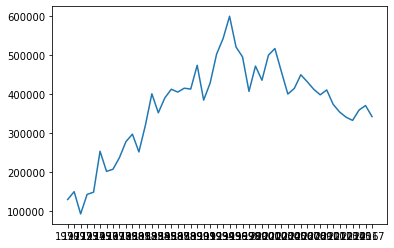

In [12]:
# 선 그래프로 시각화(방법1)
plt.plot(sr_one.index, sr_one.values)

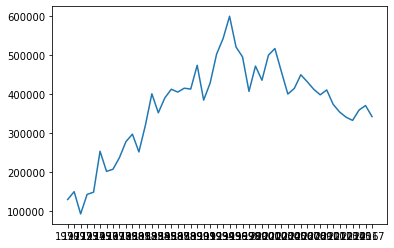

In [13]:
# 선 그래프로 시각화(방법2)
plt.plot(sr_one)

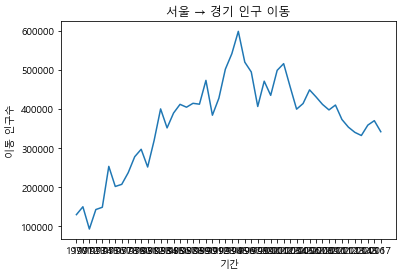

In [14]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = './Week5-실습데이터/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 → 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()    # 그래프 출력

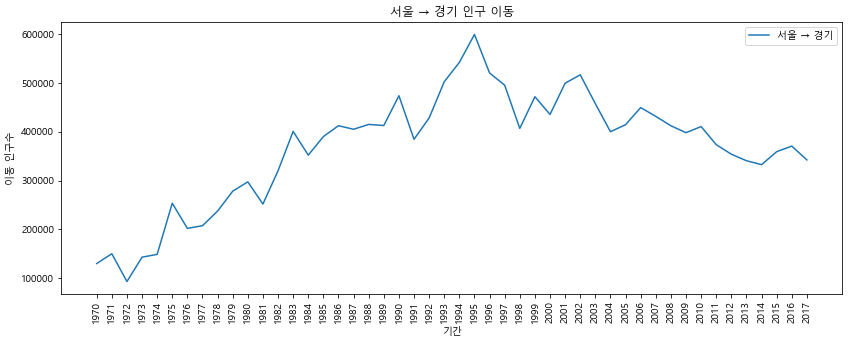

In [15]:
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

plt.plot(sr_one.index, sr_one.values)
plt.title('서울 → 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울 → 경기'], loc='best')
plt.show()

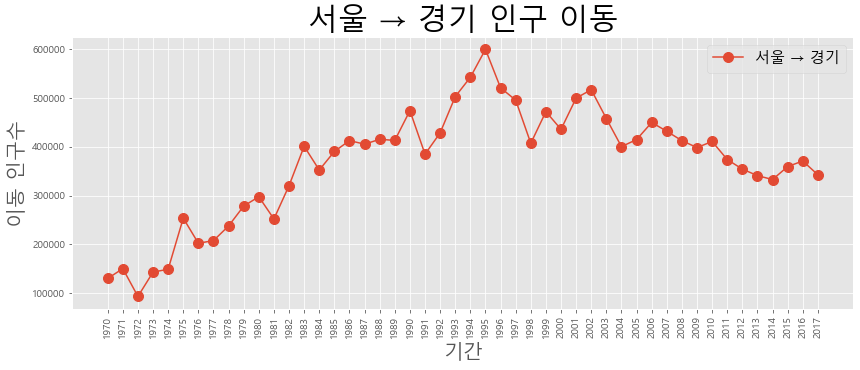

In [20]:
# 스타일 서식 지정
plt.style.use('ggplot')

plt.figure(figsize=(14, 5))
# 마커추가
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)
plt.xticks(size=10, rotation='vertical')
plt.title('서울 → 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울 → 경기'], loc='best', fontsize=15)
plt.show()

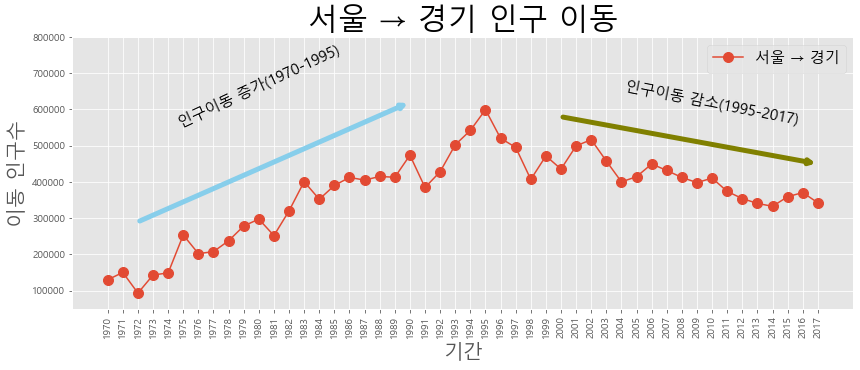

In [22]:
plt.style.use('ggplot')
plt.figure(figsize=(14, 5))

plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

plt.title('서울 → 경기 인구 이동', size=30)
plt.xticks(size=10, rotation='vertical')
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.ylim(50000, 800000)
plt.legend(labels=['서울 → 경기'], loc='best', fontsize=15)

# 주석표시 - 화살표
plt.annotate('',
            xy=(20, 620000),     # 화살표  끝점
            xytext=(2, 290000),  # 화살표 시작점
            xycoords='data',      # 좌표체계
            arrowprops=dict(arrowstyle='->', color='skyblue', lw=5))
plt.annotate('',
            xy=(47, 450000),     # 화살표  끝점
            xytext=(30, 580000),  # 화살표 시작점
            xycoords='data',      # 좌표체계
            arrowprops=dict(arrowstyle='->', color='olive', lw=5))

# 주석표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',   # 텍스트 입력
            xy=(10, 550000),               # 텍스트 위치 기준점
            rotation=25,                   # 텍스트 회전각도
            va='baseline',                 # 텍스트 상하 정렬
            ha='center',                   # 텍스트 좌우 정렬
            fontsize=15                    # 텍스트 크기
            )
plt.annotate('인구이동 감소(1995-2017)',   # 텍스트 입력
            xy=(40, 560000),               # 텍스트 위치 기준점
            rotation=-11,                   # 텍스트 회전각도
            va='baseline',                 # 텍스트 상하 정렬
            ha='center',                   # 텍스트 좌우 정렬
            fontsize=15                    # 텍스트 크기
            )

plt.show()

#### axes 활용: 화면 분할해서 그래프 여러개 그리기
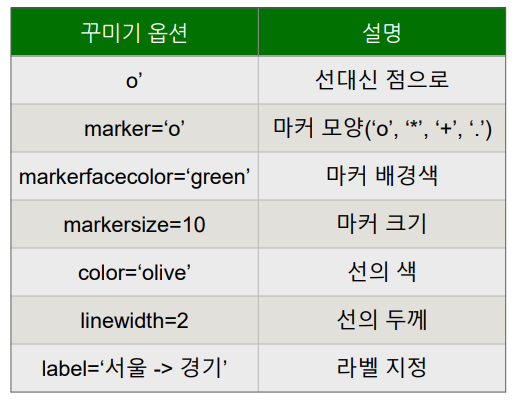

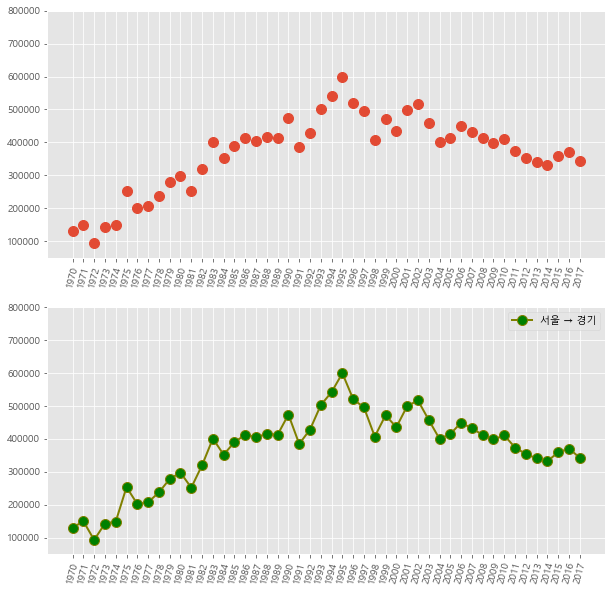

In [25]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10, color='olive',
        linewidth=2, label='서울 → 경기')
ax2.legend(loc='best')

# xy축 범위 지정
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

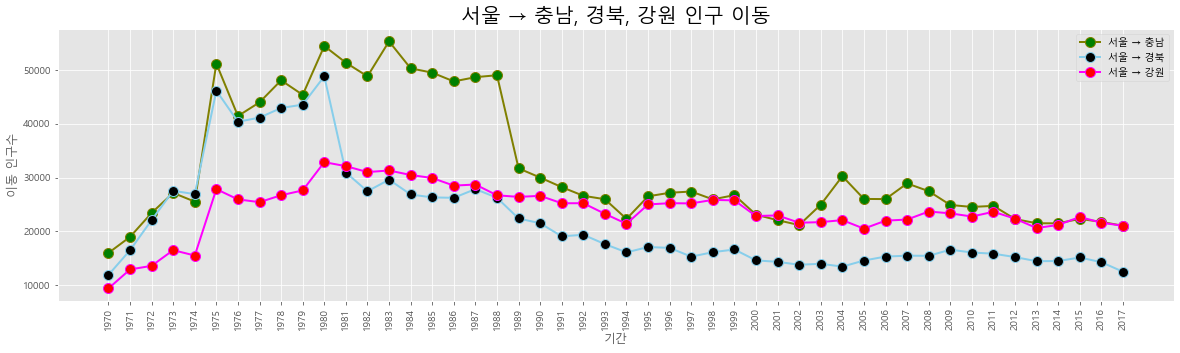

In [26]:
# axes 활용: 같은 그림(axe)에 여러개 그래프 추가

# 서울에서 '충청남도', '경상북도', '강원도'로 이동한 이구 데이터 추출
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도', :], marker='o', markerfacecolor='green',
       markersize=10, color='olive', linewidth=2, label='서울 → 충남')
ax.plot(col_years, df_3.loc['경상북도', :], marker='o', markerfacecolor='black',
       markersize=10, color='skyblue', linewidth=2, label='서울 → 경북')
ax.plot(col_years, df_3.loc['강원도', :], marker='o', markerfacecolor='red',
       markersize=10, color='magenta', linewidth=2, label='서울 → 강원')

ax.legend(loc='best')
ax.set_title('서울 → 충남, 경북, 강원 인구 이동', size=20)

ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)
ax.set_xticklabels(col_years, rotation=90)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()

#### Matplotlib 스타일 서식의 종류

In [17]:
import matplotlib.pyplot as plt

# 스타일 리스트 출력
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


#### Matplotlib에서 사용할 수 있는 색상의 종류

In [18]:
import matplotlib

# 컬러 정보를 담을 빈 딕셔너리
colors = {}

# 컬럼이름:헥사코드
for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex
    
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

#### 산점도(scatter plot)
- 두 변수간 관계를 나타낼 때 사용
- plot()에서 ‘o’ 옵션을 쓰면 사실상 산점도라고 볼수도 있음
- UCI 자동차 연비 데이터셋(auto_mpg.csv)을 활용
- 목표: 그림을 파일로 저장하기

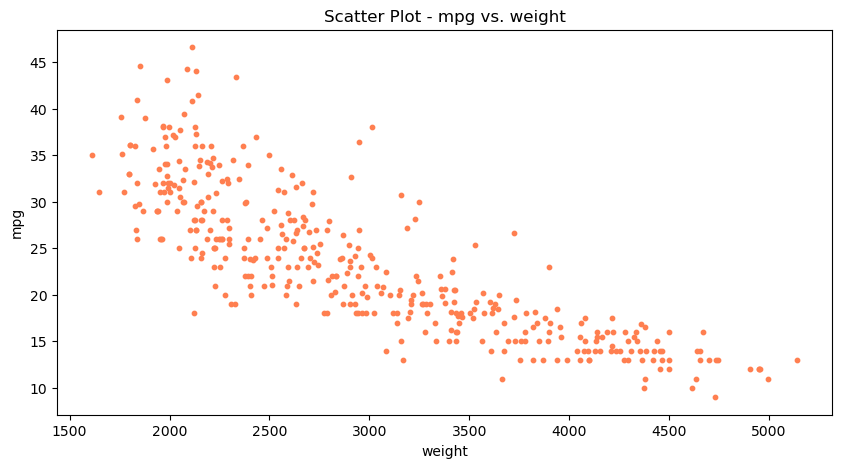

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')

df = pd.read_csv('./Week5-실습데이터/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horseposer', 'weight',
             'acceleration', 'model year', 'origin', 'name']

# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.title('Scatter Plot - mpg vs. weight')
plt.show()

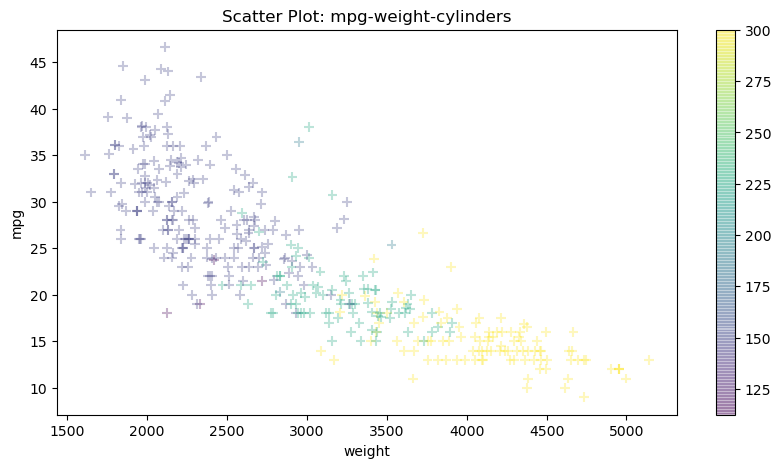

In [30]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10, 5),
       cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig('./scatter.png')
plt.savefig('./scatter_transparent.png', transparent=True)  # tranparent: 투명도

plt.show()

#### 산점도(scatter plot)와 상관계수
- 산점도: 시각적으로 두 연속형 변수의 관련도
- 피어슨 상관 계수(Pearson's r): 산점도를 수치적으로 정량화한 값
- 두 변수간 관계를 명시적으로 보이기 위해 상관계수 사용(단순화 주의)
- 산점도는 시각화로 숫자 뒤에 숨은 패턴을 파악하게 도와줌

In [31]:
# 상관계수 구하기
df[['weight', 'mpg']].corr(method='pearson')

,weight,mpg
weight,1.000000,-0.831741
mpg,-0.831741,1.000000


## 시본(seaborn): 회귀선을 포함한 산점도, 히스토그램
p. 36~40
- Matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급 버전
- 단순한 인터페이스
- 내부적으로는 matplotlib을 활용(figure, axe 등의 개념도 동일하게 적용)

In [32]:
# 유명한 데이터는 직접 받을 수 있음
import seaborn as sns

titanic = sns.load_dataset('titanic')

print(titanic.head(), '\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age      

#### 회귀선이 있는 산점도
- regplot(): 산점도를 통해 나타난 변수관계를 좀 더 명확하게 시각화
- 회귀선의 기울기가 피어슨 상관계수

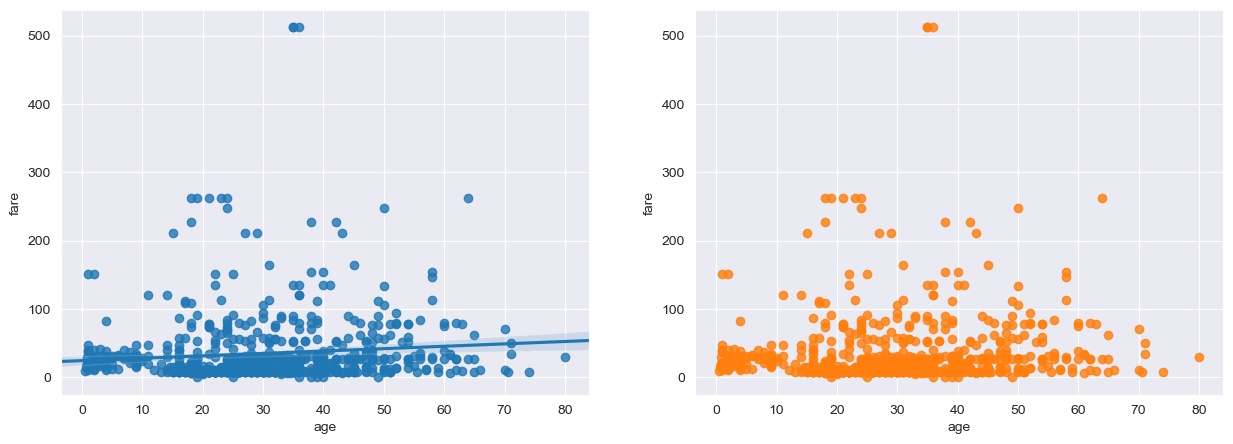

In [34]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성(figure 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age',        # x축 변수
            y='fare',       # y축 변수
            data=titanic,   # 데이터
            ax=ax1)         # axe객체 - 1번째 그래프

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age',        # x축 변수
            y='fare',       # y축 변수
            data=titanic,   # 데이터
            ax=ax2,         # axe객체 - 1번째 그래프
            fit_reg=False)

plt.show()

#### 히스토그램/커널 밀도 그래프
- distplot(): 하나의 변수가 어떤 분포를 가지는지 시각화

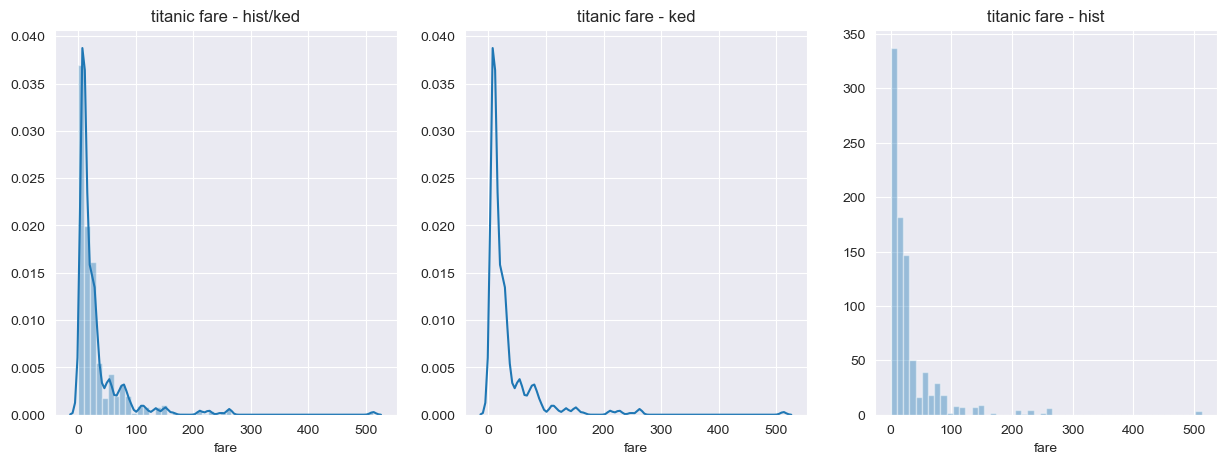

In [35]:
sns.set_style('darkgrid')

# 그래프 객체 생성(figure 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본값
sns.distplot(titanic['fare'], ax=ax1)
# hist=False
sns.distplot(titanic['fare'], hist=False, ax=ax2)
# kde=False
sns.distplot(titanic['fare'], kde=False, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()